In [35]:
# 1. Import the necessary libraries and load the dataset.
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import tree
iris=load_iris()
# 2. Create a dataframe with the four feature variables
x = pd.DataFrame(iris.data) 
y = iris.target 

In [2]:
print(iris.feature_names,'\n')
print(x.head(),'\n')
print('There are 3 classes of species: sesota, versicolor, and virginica.\n',y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2 

There are 3 classes of species: sesota, versicolor, and virginica.
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
#3. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
# Checking SHape of X_train
X_train.shape

(120, 4)

In [5]:
# Checking SHape of y_train
y_train.shape

(120,)

In [6]:
# Checking SHape of X_test
X_test.shape

(30, 4)

In [7]:
# Checking SHape of y_test
y_test.shape

(30,)

Let’s now dive into the various models that sklearn provides.

**Naive Bayes classifier**

The gaussian Naive Bayes is a popular classification algorithm. It applies Bayes’ theorem of conditional probability to the case. It assumes that the features are independent of each other, while the targets are dependent on them.

**Bayes' Theorem** states that the conditional probability of an event, based on the occurrence of another event, is equal to the likelihood of the second event given the first event multiplied by the probability of the first event.

**Formula:**

![bayesTheorem](bayesTheorem.PNG)

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
print('Score for Training data ',model.score(X_train,y_train))
print('Score for Testing data',model.score(X_test,y_test))

Score for Training data  0.95
Score for Testing data 0.9666666666666667


In [10]:
model.predict(X_test)

array([2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 2])

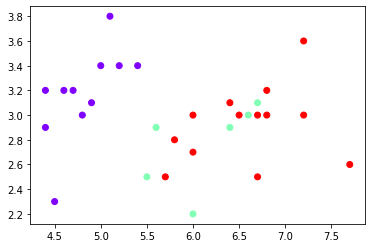

In [45]:
plt.scatter(X_test[0],X_test[1],c=model.predict(X_test),cmap='rainbow')

**Decision tree classifier**

This is a tree-based structure, where a dataset is split based on values of various attributes. Finally, the data points with features of similar values are grouped together. Make sure to finetune the maximum depth and minimum leaf split parameters for better results. It also helps to avoid overfitting.

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.75, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(0.4, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.122\nsamples = 46\nvalue = [0, 43, 3]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 4.95\ngini = 0.044\nsamples = 44\nvalue = [0, 43, 1]'),
 Text(0.2, 0.25, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1,

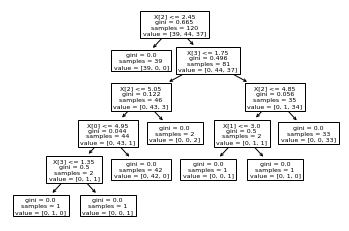

In [39]:
tree.plot_tree(model)

In [12]:
print('Score for Training data ',model.score(X_train,y_train))
print('Score for Testing data',model.score(X_test,y_test))

Score for Training data  1.0
Score for Testing data 0.9333333333333333


**KNN classification**

KNN (K nearest neighbor) is a classification algorithm that groups data points into clusters. 
The value of K can be chosen as a parameter “n_neighbors”. The algorithms form K clusters and assign each data point to the nearest cluster.
KNN performs multiple iterations where the distance of the points are the centers of the clusters, which are calculated and reassigned optimally.

In [47]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(x, y)

KNeighborsClassifier()

In [48]:
clf.predict(X_test)

array([2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 2])

In [49]:
print('Score for Training data ',clf.score(X_train,y_train))
print('Score for Testing data',clf.score(X_test,y_test))

Score for Training data  0.975
Score for Testing data 0.9333333333333333


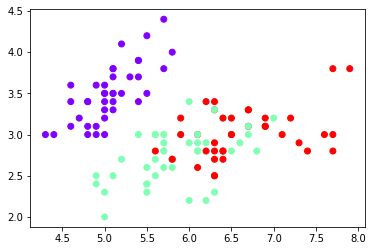

In [55]:
plt.scatter(X_train[0],X_train[1],c=clf.predict(X_train),cmap='rainbow')

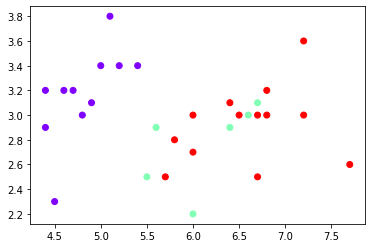

In [57]:
plt.scatter(X_test[0],X_test[1],c=clf.predict(X_test),cmap='rainbow')